In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [20]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]

x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

print(x_train.shape)
print(y_train.shape)

torch.Size([6, 2])
torch.Size([6, 1])


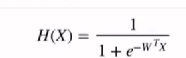

# computing hypothesis

In [4]:
W = torch.zeros((2, 1), requires_grad = True)
b = torch.zeros(1, requires_grad = True)

hypothesis = 1/ (1 +torch.exp(-(x_train.matmul(W) +b)))
print(hypothesis)
print(hypothesis.shape)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<MulBackward0>)
torch.Size([6, 1])


In [5]:
# torch에서 제공해주는 sigmoid 함수
hypothesis = torch.sigmoid(x_train.matmul(W) + b)

print(hypothesis)
print(hypothesis.shape)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward0>)
torch.Size([6, 1])


# computin cost function

In [6]:
F.binary_cross_entropy(hypothesis, y_train)

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward0>)

# full code

In [12]:
# full code

W = torch.zeros((2, 1), requires_grad = True)
b = torch.zeros(1, requires_grad = True)
optimizer = optim.SGD([W,b], lr=1)

nb_epochs =1000
for epoch in range(nb_epochs +1):
  hypothesis = torch.sigmoid(x_train.matmul(W) + b)
  cost = F.binary_cross_entropy(hypothesis, y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  print('epoch {:4d}/{} cost:{:.6f}'.format(epoch, nb_epochs, cost.item()))

epoch    0/1000 cost:0.693147
epoch    1/1000 cost:1.009292
epoch    2/1000 cost:1.410617
epoch    3/1000 cost:2.546337
epoch    4/1000 cost:0.621073
epoch    5/1000 cost:0.812270
epoch    6/1000 cost:1.592355
epoch    7/1000 cost:0.442200
epoch    8/1000 cost:0.460082
epoch    9/1000 cost:0.495572
epoch   10/1000 cost:0.671355
epoch   11/1000 cost:0.599569
epoch   12/1000 cost:0.955039
epoch   13/1000 cost:0.495679
epoch   14/1000 cost:0.658035
epoch   15/1000 cost:0.500852
epoch   16/1000 cost:0.681981
epoch   17/1000 cost:0.473170
epoch   18/1000 cost:0.621828
epoch   19/1000 cost:0.454665
epoch   20/1000 cost:0.590509
epoch   21/1000 cost:0.437992
epoch   22/1000 cost:0.565008
epoch   23/1000 cost:0.422848
epoch   24/1000 cost:0.543383
epoch   25/1000 cost:0.408704
epoch   26/1000 cost:0.523732
epoch   27/1000 cost:0.395283
epoch   28/1000 cost:0.505132
epoch   29/1000 cost:0.382432
epoch   30/1000 cost:0.487127
epoch   31/1000 cost:0.370061
epoch   32/1000 cost:0.469492
epoch   33

# evaluation

In [13]:
hypothesis = torch.sigmoid(x_train.matmul(W) +b)
print(hypothesis[:5])

prediction =  hypothesis >= torch.FloatTensor([0.5])
print(prediction[:5])
print(y_train[:5])

tensor([[2.7648e-04],
        [3.1608e-02],
        [3.8977e-02],
        [9.5622e-01],
        [9.9823e-01]], grad_fn=<SliceBackward0>)
tensor([[False],
        [False],
        [False],
        [ True],
        [ True]])
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.]])


In [14]:
correct_prediction = prediction.float() == y_train
print(correct_prediction)

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True]])


# higher implementation with class

In [33]:
class BinaryClassifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(2, 1)
    self.sigmoid =  nn.Sigmoid()
  def forward(self, x):
    return self.sigmoid(self.linear(x))

In [34]:
model = BinaryClassifier()

In [35]:
# full code

optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs =100
for epoch in range(nb_epochs +1):
  hypothesis = model(x_train)
  cost = F.binary_cross_entropy(hypothesis, y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 10 ==0:
    prediction =  hypothesis >= torch.FloatTensor([0.5])
    correct_prediction = prediction.float() == y_train
    correct_prediction = prediction.float() == y_train
    acc = correct_prediction.sum().item() / len(correct_prediction)
    print('epoch {:4d}/{} cost:{:.6f} acc {:2.2f}'.format(epoch, nb_epochs, cost.item(), acc*100))

epoch    0/100 cost:0.590670 acc 83.33
epoch   10/100 cost:0.698175 acc 50.00
epoch   20/100 cost:0.501279 acc 66.67
epoch   30/100 cost:0.422415 acc 66.67
epoch   40/100 cost:0.358542 acc 83.33
epoch   50/100 cost:0.303684 acc 83.33
epoch   60/100 cost:0.254608 acc 83.33
epoch   70/100 cost:0.210298 acc 100.00
epoch   80/100 cost:0.174645 acc 100.00
epoch   90/100 cost:0.153418 acc 100.00
epoch  100/100 cost:0.141555 acc 100.00
